In [17]:
%pylab inline
#The above doesn't work for me for some reason, so I still need the following
%matplotlib inline


Populating the interactive namespace from numpy and matplotlib


# Helper functions

In [2]:
from PIL import Image
import os
import pandas as pd
import pylab as pl

In [3]:
def load_images(img_dir, grayscale=False):
    """Loads images from within a specified directory.

    Args:
      img_dir (str): The directory from which to load (.jpg) images.
      grayscale (bool): Whether to convert the image into grayscale. Defaults to False.

    Returns:
      images: An array of image objects loaded from the specified directory

    """
    images = []

    for file in os.listdir(img_dir):
        if file.endswith(".jpg"):
            im = Image.open(os.path.join(img_dir, file))

            im = im.resize((100, 100))

            if grayscale:
                im = np.array(im, dtype=np.float64) / 255

                # Convert image to grayscale
                r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
                gray = 0.2989*r + 0.5870*g + 0.1140*b
                im = gray.reshape((1, -1))[0]

            images.append(im)

    return images

def plot_image_space(images, X, title="Projection of the Images into 2 Dimensions"):
    """Generates and shows a plot of images in a feature space.

    A figure with one plot is generated. The plot displays the location of each image in 
    relation to the image's feature values in the input feature space (X).

    Args:
      images (Image): An image.
      images (SciPy array): An array of SSQs, one computed for each k.

    """
    # min-max normalization    
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    # Create a figure
    pl.figure(figsize=(16, 5))
    ax = pl.subplot(111)
    #ax.axis('off')

    # Generate picture thumbnails in the plot
    if hasattr(matplotlib.offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        for i in range(len(images)):
            imagebox = matplotlib.offsetbox.OffsetImage(images[i], zoom=.65)
            ab = matplotlib.offsetbox.AnnotationBbox(imagebox, X[i][0:2])                                  
            ax.add_artist(ab)

    # Add figure labels and ticks
    pl.title(title, fontsize=16)
    pl.xticks([]), pl.yticks([])

    # Add figure bounds
    pl.ylim((np.min(X, axis=0)[1])-0.25,(np.max(X, axis=0)[1])+0.25)
    pl.xlim((np.min(X, axis=0)[0])-0.1,(np.max(X, axis=0)[0])+0.1)


## Load data

In [4]:
img_dir = os.path.join(os.getcwd(), "images") # directory path
images = load_images(img_dir) # load images in the specified directory

In [5]:
X = pd.DataFrame([im.histogram() for im in images])

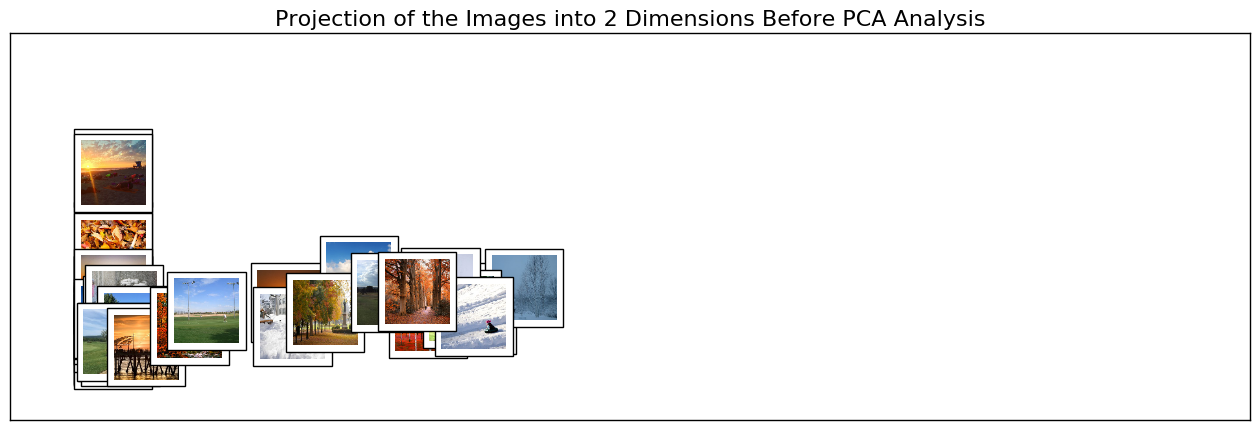

In [6]:
plot_image_space(images, X, title="Projection of the Images into 2 Dimensions Before PCA Analysis")

## Start your assignment here...

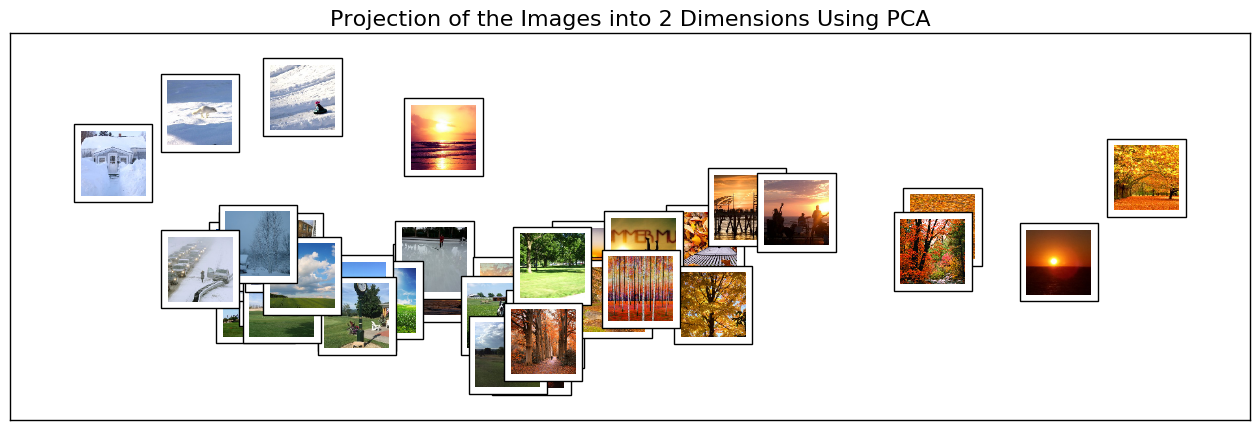

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, whiten=True)
X_pca = pca.fit(X).transform(X)
plot_image_space(images, X_pca, title="Projection of the Images into 2 Dimensions Using PCA")

----------------------------------

When two images are close to each other in the projection it means they have similar levels of color values in similar areas of the images according to the histogram that are deemed significant after PCA, for example images with lots of blue pixels will be closer to each other than those with fewer blue pixels.  Images far apart in the projection have fewer color levels in common, for example an image with lots of red pixels will be far away from an image with lots of blue and green pixels.

Images of winter tend to cluster due to the presence of lots of whites, greys, and blues in images of snow, ice, and clouds.  Similarly, images of autumn also display a certain degree of clustering due to the presence of high levels of yellows, oranges, and reds due to leaves developing these hues in autumn, although this cluster is less pronounced.

--------------------

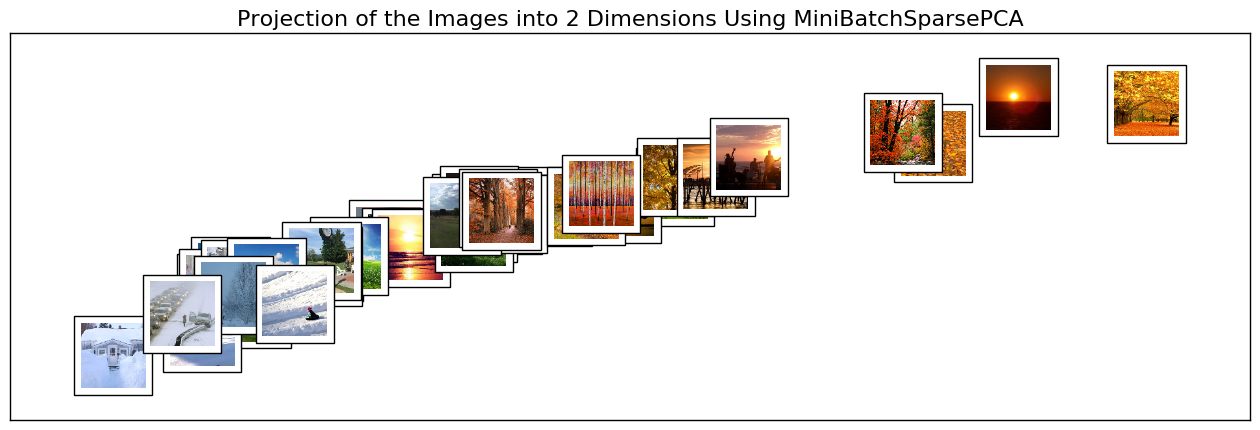

In [15]:
from sklearn.decomposition import MiniBatchSparsePCA

pca_sparse = MiniBatchSparsePCA(n_components=2, n_iter=5000)
X_pca_sparse = pca_sparse.fit(X).transform(X)
plot_image_space(images, X_pca_sparse, title="Projection of the Images into 2 Dimensions Using MiniBatchSparsePCA")